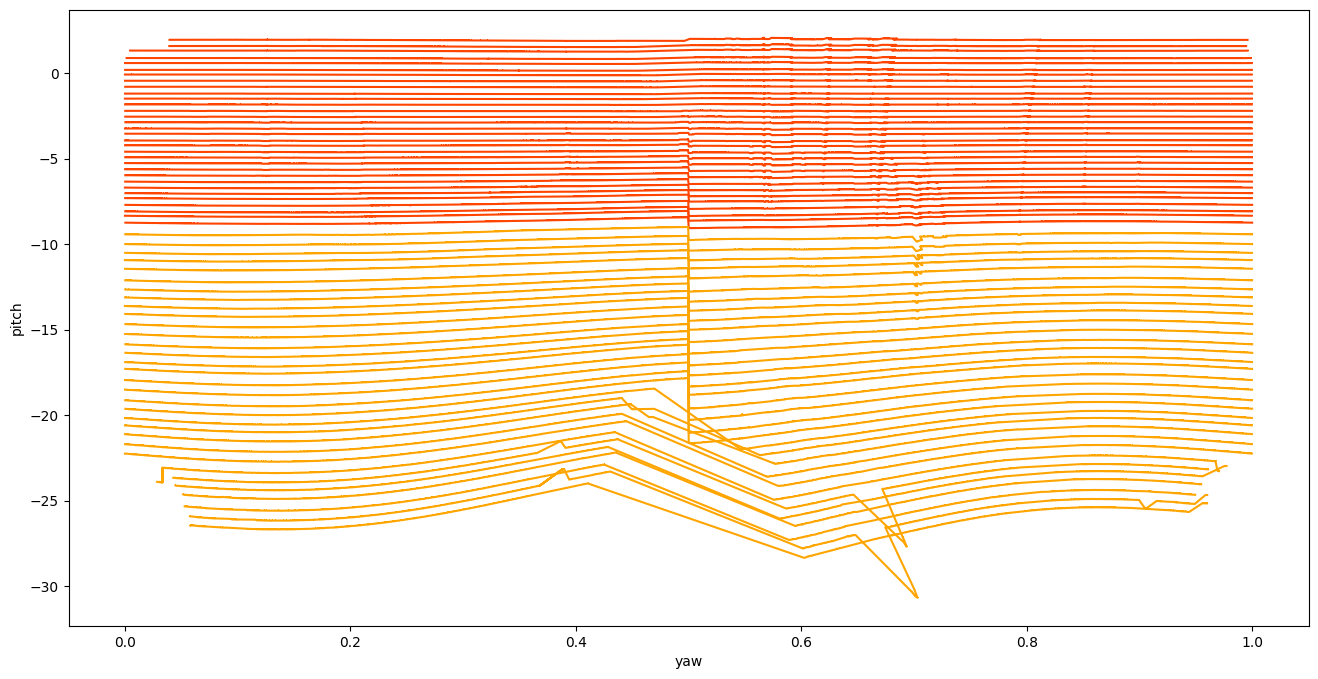

In [29]:
import numpy as np
import matplotlib.pyplot as plt

odom_data_path = '/media/shitong/passport/SemanticKITTI/sequences/' + str(4).zfill(2) + '/velodyne/' + str(1).zfill(6) + '.bin'

calib_path = './config/calib.txt'
with open(calib_path) as calib_file:
    data = calib_file.readlines()
    T_xyz = data[3].split(':')[1].split(' ')[1:]
    T_xyz = np.array(T_xyz).reshape(4, 4).astype(np.float32)

pc_data = np.fromfile(odom_data_path, np.float32).reshape((-1, 4))
xyz = pc_data[:, :3]
xyz1 = np.concatenate([xyz, np.ones((xyz.shape[0],1))],axis=1)
xyz = (T_xyz[:3, :] @ xyz1.T).T
pc_range = np.linalg.norm(xyz, axis=1)
pitch = np.arcsin(xyz[:, 2] / pc_range) / np.pi * 180
yaw = np.arctan2(-xyz[:, 1], -xyz[:, 0]) / np.pi
yaw = 0.5 * (yaw + 1)
jump_idx = ((yaw[1:] < 0.2) * (yaw[:-1] > 0.8))
jump_idx = np.nonzero(jump_idx)[0] + 1
jump = np.zeros_like(pitch).astype(np.uint32)
jump[jump_idx] = 1
jump = np.cumsum(jump).astype(np.uint32)

plt.figure(figsize=(16, 8))
odom_real_pitch = []
for line in range(jump.max() + 1):
    cur_pitch = pitch[jump == line]
    x = yaw[jump == line]
    odom_real_pitch.append(np.median(cur_pitch))
    if line < 32:
        color = 'orangered'
    else:
        color = 'orange'
    plt.plot(x, cur_pitch, color=color, marker=',', linestyle='-', label=str(line))
# x = range(len(pitch))
# plt.plot(x, pitch, color='orangered', marker=',', linestyle='-',lw=1)
plt.xlabel('yaw')
plt.ylabel('pitch')
plt.show()

2170


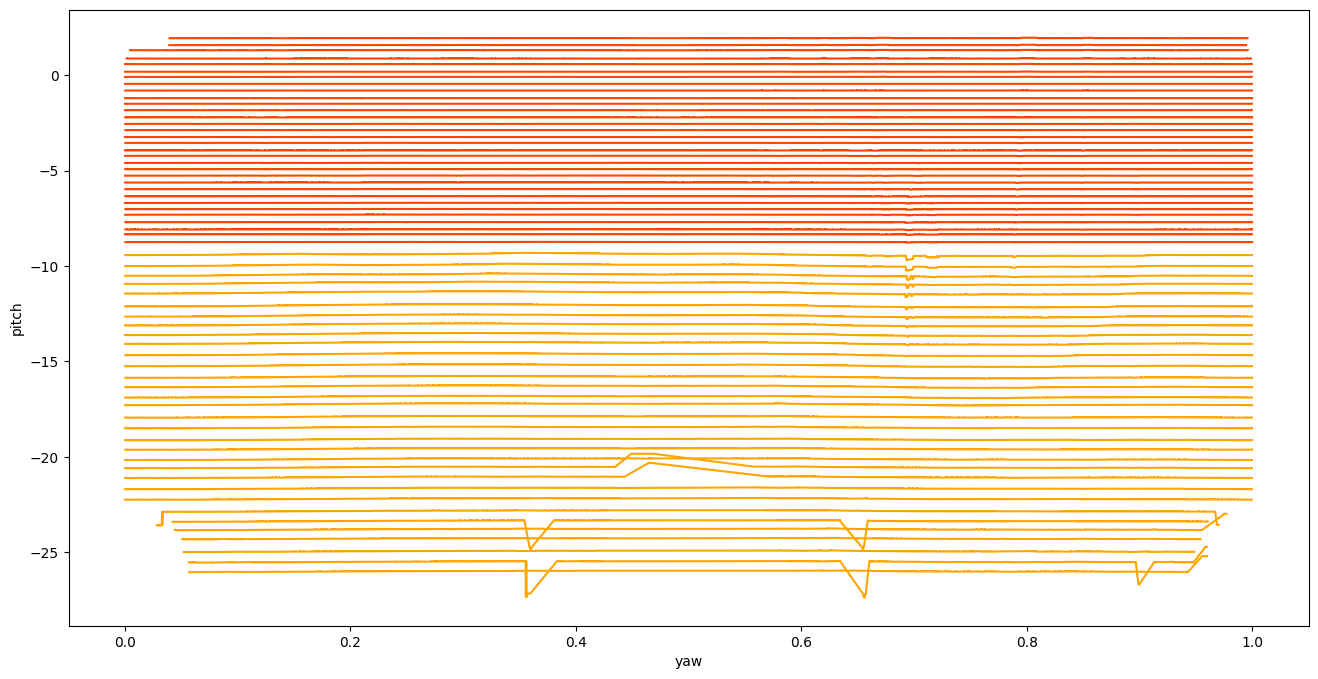

In [30]:
import numpy as np
import matplotlib.pyplot as plt

raw_data_path = '/home/shitong/Datasets/2011_09_30_drive_0016_sync/velodyne_points/data/' + str(1).zfill(10) + '.bin'

calib_path = './config/calib.txt'
with open(calib_path) as calib_file:
    data = calib_file.readlines()
    T_xyz = data[3].split(':')[1].split(' ')[1:]
    T_xyz = np.array(T_xyz).reshape(4, 4).astype(np.float32)

pc_data = np.fromfile(raw_data_path, np.float32).reshape((-1, 4))
xyz = pc_data[:, :3]
xyz1 = np.concatenate([xyz, np.ones((xyz.shape[0],1))],axis=1)
xyz = (T_xyz[:3, :] @ xyz1.T).T
pc_range = np.linalg.norm(xyz, axis=1)
pitch = np.arcsin(xyz[:, 2] / pc_range) / np.pi * 180
yaw = np.arctan2(-xyz[:, 1], -xyz[:, 0]) / np.pi
yaw = 0.5 * (yaw + 1)
jump_idx = ((yaw[1:] < 0.2) * (yaw[:-1] > 0.8))
jump_idx = np.nonzero(jump_idx)[0] + 1
jump = np.zeros_like(pitch).astype(np.uint32)
jump[jump_idx] = 1
jump = np.cumsum(jump).astype(np.uint32)

max_points=0
for line in range(jump.max()+1):
    cur_points = len(pitch[jump==line])
    if cur_points > max_points:
        max_points = cur_points
print(max_points)

plt.figure(figsize=(16, 8))
raw_real_pitch = []
for line in range(jump.max() + 1):
    cur_pitch = pitch[jump == line]
    x = yaw[jump == line]
    raw_real_pitch.append(np.median(cur_pitch))
    if line < 32:
        color = 'orangered'
    else:
        color = 'orange'
    plt.plot(x, cur_pitch, color=color, marker=',', linestyle='-', label=str(line))
# x = range(len(pitch))
# plt.plot(x, pitch, color='orangered', marker=',', linestyle='-',lw=1)
plt.xlabel('yaw')
plt.ylabel('pitch')
plt.show()

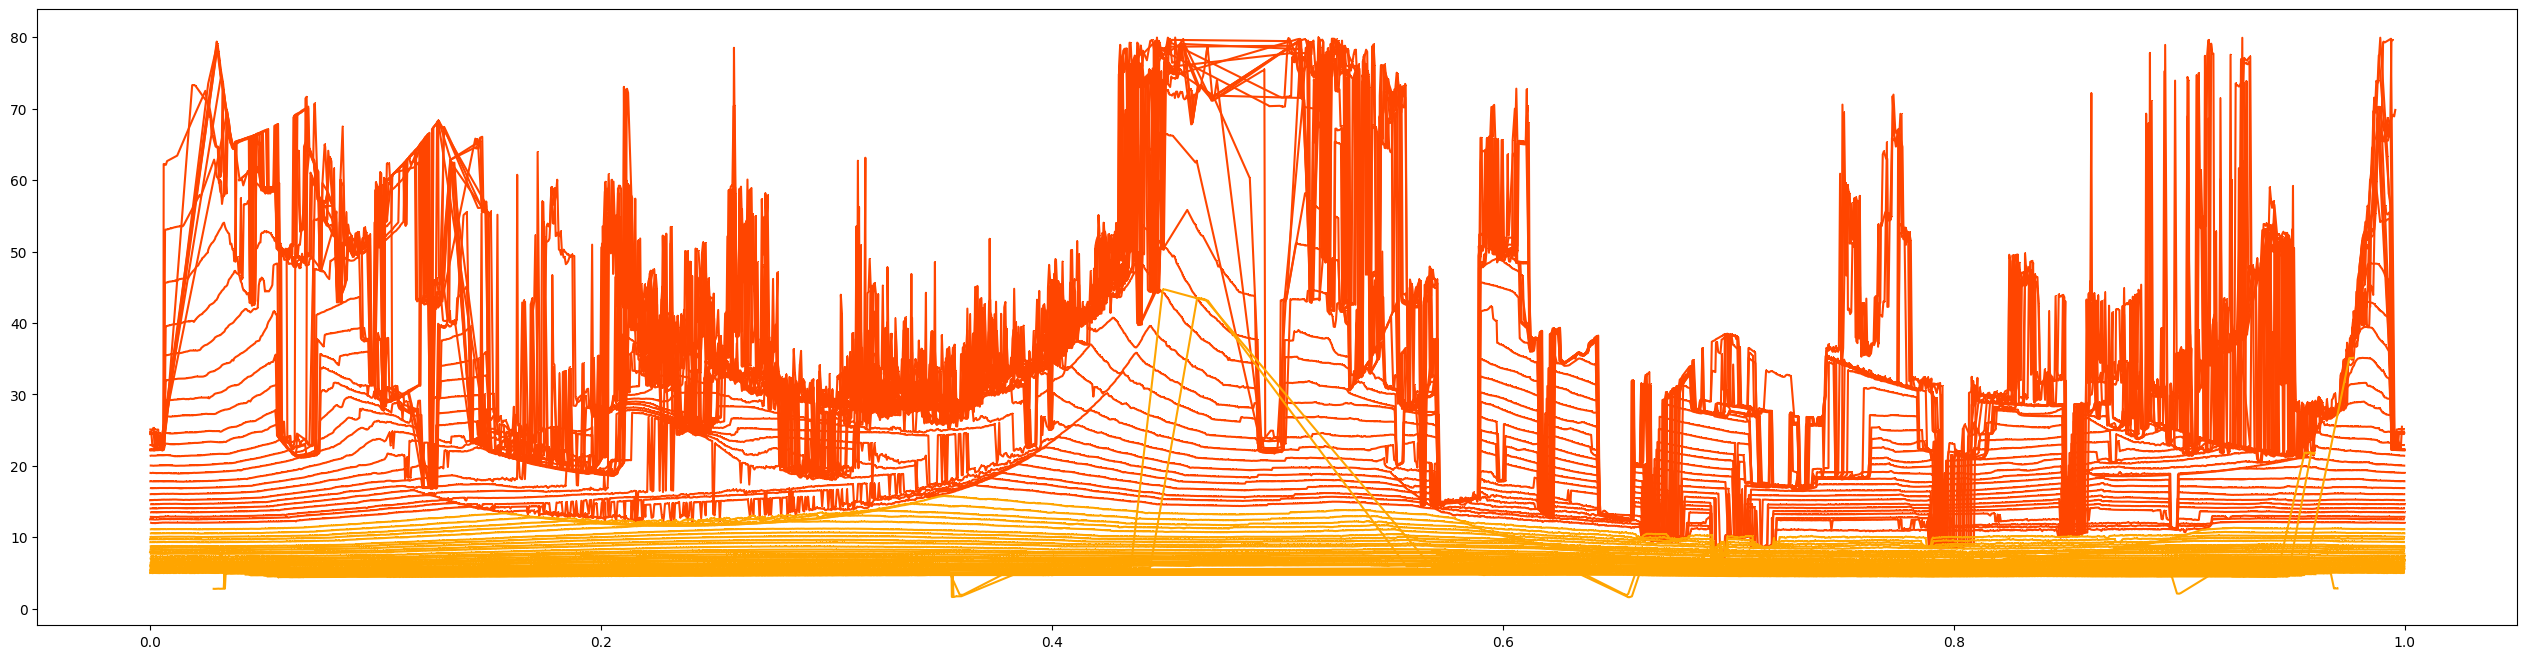

In [31]:
import matplotlib.pyplot as plt

raw_pc_range = np.linalg.norm(xyz, axis=1)
x = range(xyz.shape[0])
plt.figure(figsize=(32, 8))
for line in range(jump.max() + 1):
    cur_range = raw_pc_range[jump == line]
    x = yaw[jump == line]
    if line < 32:
        color = 'orangered'
    else:
        color = 'orange'
    plt.plot(x, cur_range, color=color, marker=',', linestyle='-', label=str(line))
plt.show()

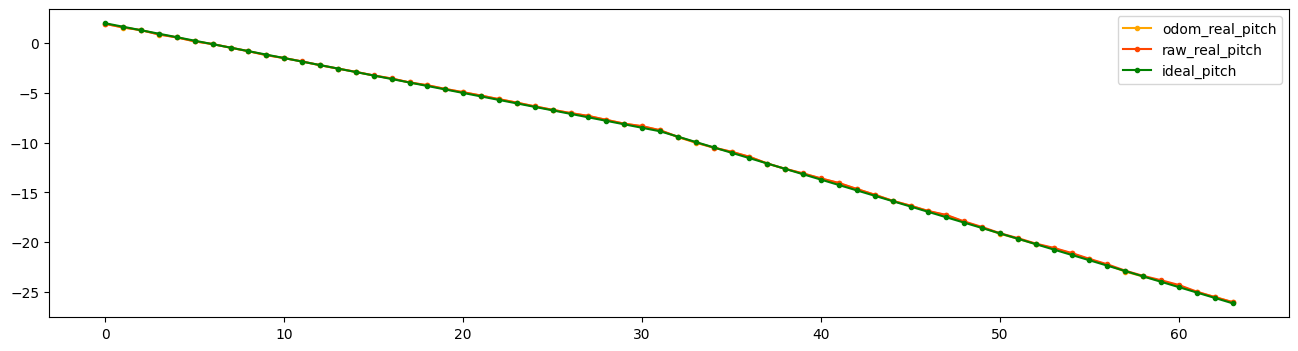

In [32]:
'''验证一下理想的线束pitch和实际的差距'''
ideal_pitch = []
insert_pitch = []
pitch = 2.
in_pitch = 1.8
for line in range(jump.max() + 1):
    if line==0:
        ideal_pitch.append(pitch)
        insert_pitch.append(in_pitch)
    elif line <32:
        pitch -= 0.35
        in_pitch -=0.35
        ideal_pitch.append(pitch)
        insert_pitch.append(in_pitch)
    else:
        pitch -= 0.54
        in_pitch -=0.54
        ideal_pitch.append(pitch)
        insert_pitch.append(in_pitch)

x = range(jump.max()+1)
plt.figure(figsize=(16,4))
plt.plot(x, odom_real_pitch, color='orange', marker='.',linestyle='-',label='odom_real_pitch')
plt.plot(x, raw_real_pitch, color='orangered', marker='.',linestyle='-',label='raw_real_pitch')
plt.plot(x, ideal_pitch, color='green', marker='.',linestyle='-',label='ideal_pitch')
# plt.plot(x, insert_pitch, color='blue', marker=',',linestyle='-',label='insert_pitch')
plt.legend()
plt.show()

In [33]:
from utils.fourViewProj import FourViewProj

odom_four_view_proj = FourViewProj(320, 1216)
raw_four_view_proj = FourViewProj(320, 1216)
calib_path = './config/calib.txt'
odom_four_view_proj.forward(odom_data_path, calib_path)
raw_four_view_proj.forward(raw_data_path, calib_path)
raw_four_view_proj.compare4ProjImg(odom_four_view_proj)
